In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [35]:
plt.style.use('fivethirtyeight') # For plots

In [73]:
data=pd.read_csv('../input/hourly-energy-consumption/PJME_hourly.csv')

In [37]:
data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [38]:
data['Datetime']

0         2002-12-31 01:00:00
1         2002-12-31 02:00:00
2         2002-12-31 03:00:00
3         2002-12-31 04:00:00
4         2002-12-31 05:00:00
                 ...         
145361    2018-01-01 20:00:00
145362    2018-01-01 21:00:00
145363    2018-01-01 22:00:00
145364    2018-01-01 23:00:00
145365    2018-01-02 00:00:00
Name: Datetime, Length: 145366, dtype: object

In [39]:
data=data.set_index('Datetime')

In [40]:
color=sns.color_palette()

<Axes: title={'center': 'PJME Hourly EC'}, xlabel='Datetime'>

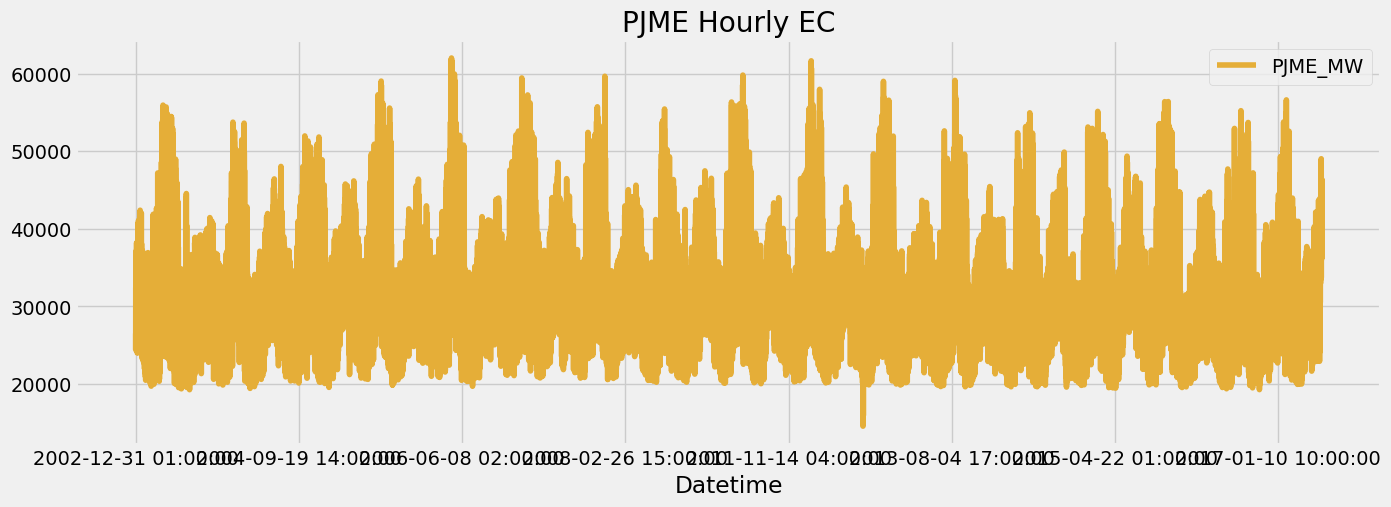

In [41]:
data.plot(style="-",figsize=(15,5), color=color[2],title="PJME Hourly EC")

In [42]:
data.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=145366)

In [43]:
data.index=pd.to_datetime(data.index)

<Axes: title={'center': 'PJME Hourly EC'}, xlabel='Datetime'>

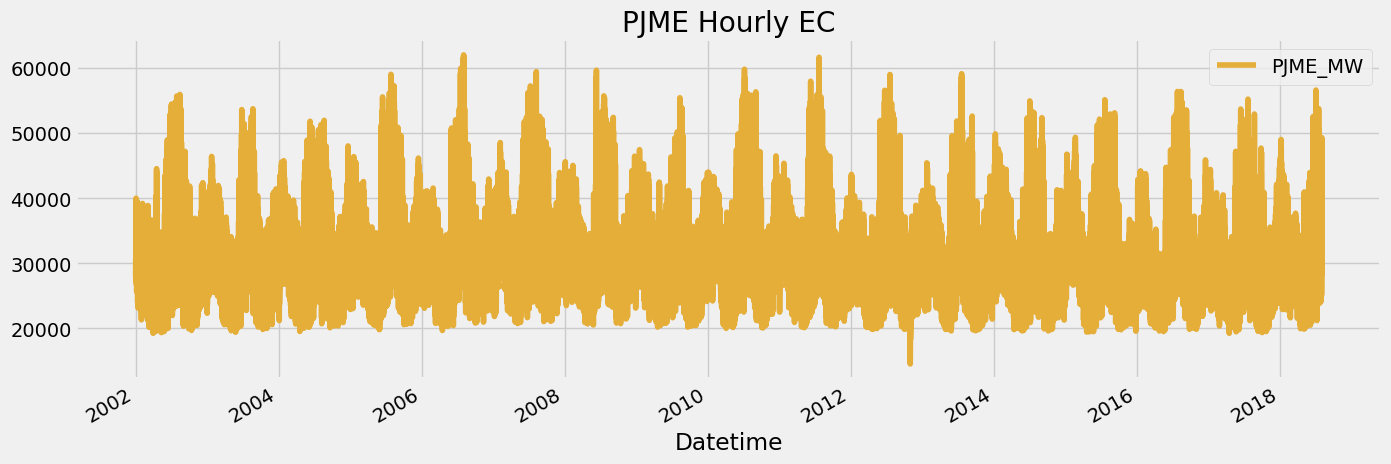

In [44]:
data.plot(style="-",figsize=(15,5), color=color[2],title="PJME Hourly EC")

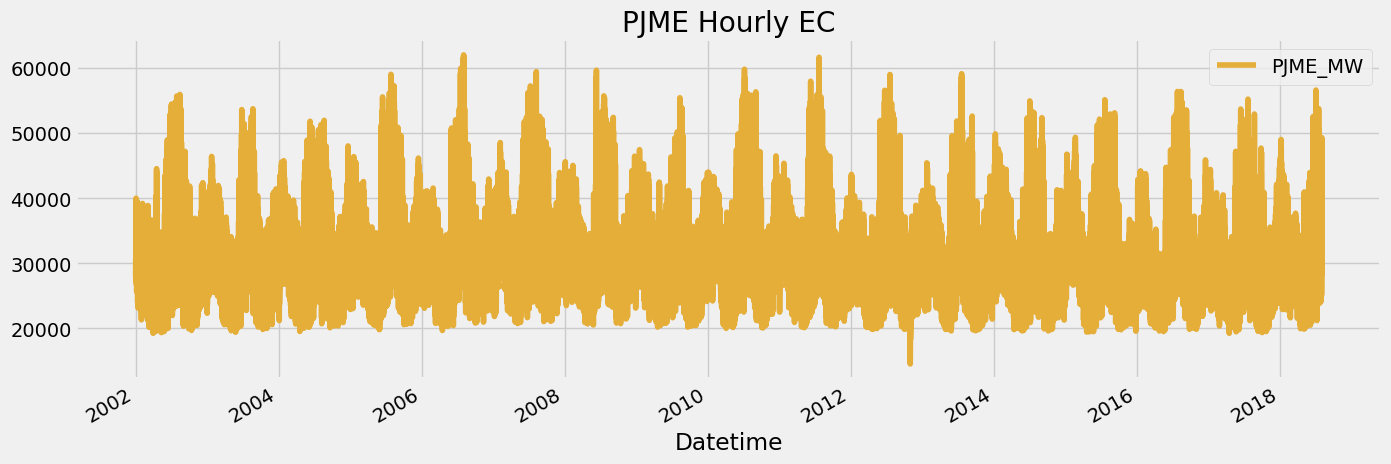

In [45]:
data.plot(style="-",figsize=(15,5), color=color[2],title="PJME Hourly EC")
plt.show()

# Train Test Split

In [46]:
data

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [47]:
data.sample(10)

,PJME_MW
Datetime,
2002-02-11 17:00:00,33095.0
2002-05-03 08:00:00,29029.0
2010-05-29 18:00:00,34350.0
2017-04-14 02:00:00,21224.0
2002-11-07 08:00:00,32061.0
2006-07-05 18:00:00,43463.0
2008-09-07 11:00:00,32089.0
2014-11-08 16:00:00,26937.0
2006-11-07 07:00:00,31392.0


In [48]:
train=data.loc[data.index<'11-11-2012']
test=data.loc[data.index>='11-11-2012']

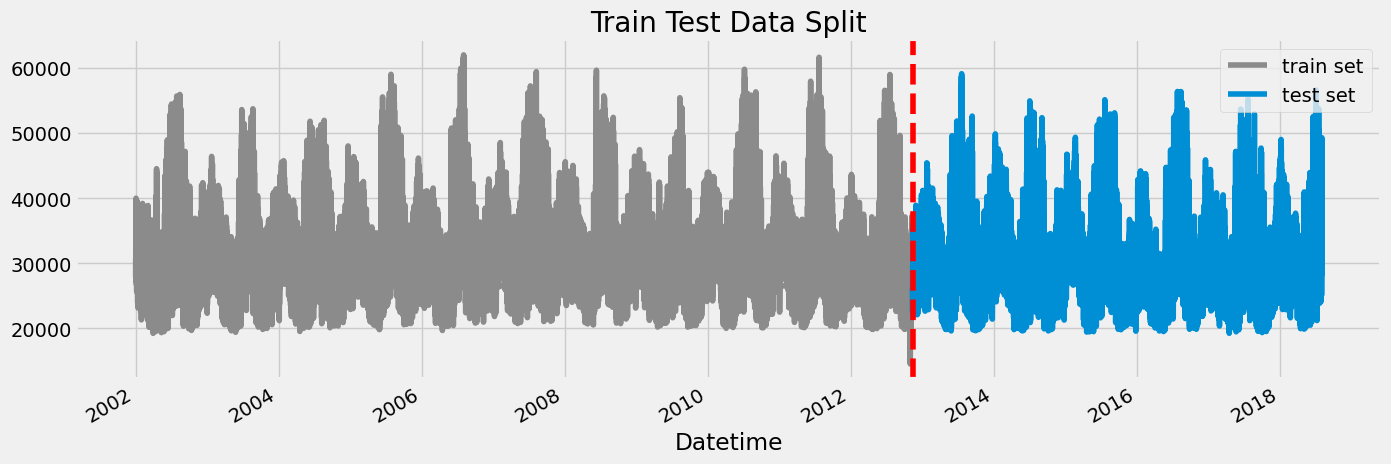

In [49]:
fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Training Data",color=color[4],title="Train Test Data Split")
test.plot(ax=ax,label="Testing Data")
ax.axvline('11-11-2012',color="red",ls="--")
ax.legend(['train set','test set'])

In [50]:
data.sample(20)

,PJME_MW
Datetime,
2004-12-06 14:00:00,35136.0
2009-01-17 15:00:00,39630.0
2017-11-04 11:00:00,25985.0
2014-05-10 17:00:00,28295.0
2013-12-15 11:00:00,32567.0
2007-05-07 04:00:00,22032.0
2010-10-18 12:00:00,31019.0
2008-06-09 22:00:00,53264.0
2008-08-28 01:00:00,27422.0


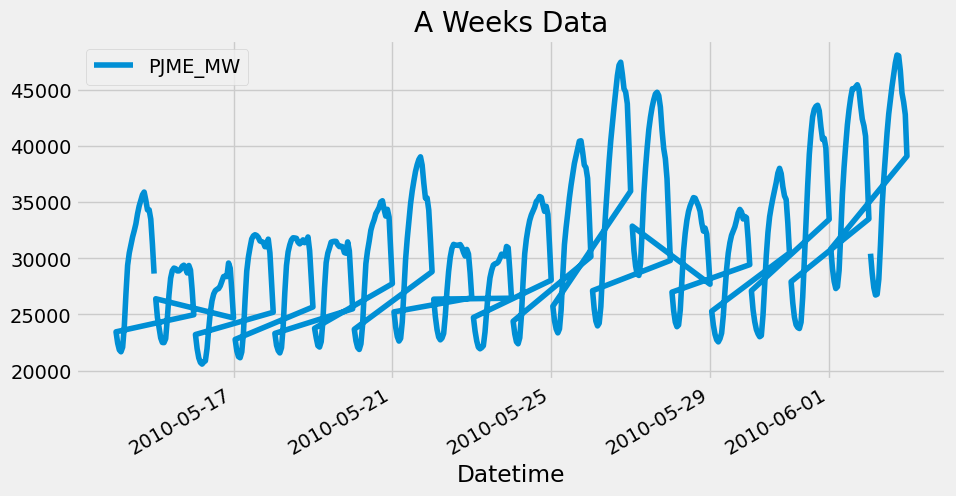

In [51]:
data.loc[(data.index > '05-14-2010') & (data.index < '06-03-2010')] \
    .plot(figsize=(10, 5), title='A Weeks Data')

plt.show()

# Feature Creation

In [52]:
def feature(data):
    data['hour']=data.index.hour
    data['dayofweek']=data.index.dayofweek
    data['quarter']=data.index.quarter
    data['month']=data.index.month
    data['year']=data.index.year
    data['dayofyear']=data.index.dayofyear
    return data


In [53]:
data=feature(data)
data.sample(5)

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2012-11-15 20:00:00,35592.0,20,3,4,11,2012,320
2012-07-08 23:00:00,41977.0,23,6,3,7,2012,190
2005-11-22 11:00:00,35371.0,11,1,4,11,2005,326
2005-05-13 19:00:00,29250.0,19,4,2,5,2005,133
2005-10-12 13:00:00,32587.0,13,2,4,10,2005,285


# Visualization

In [54]:
data.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

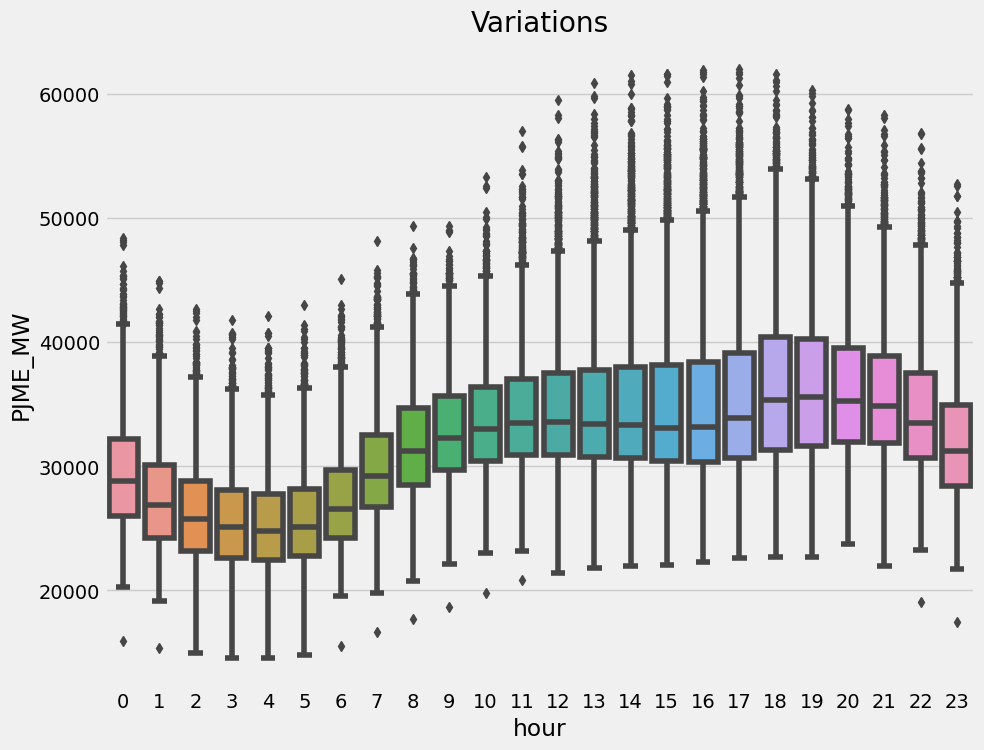

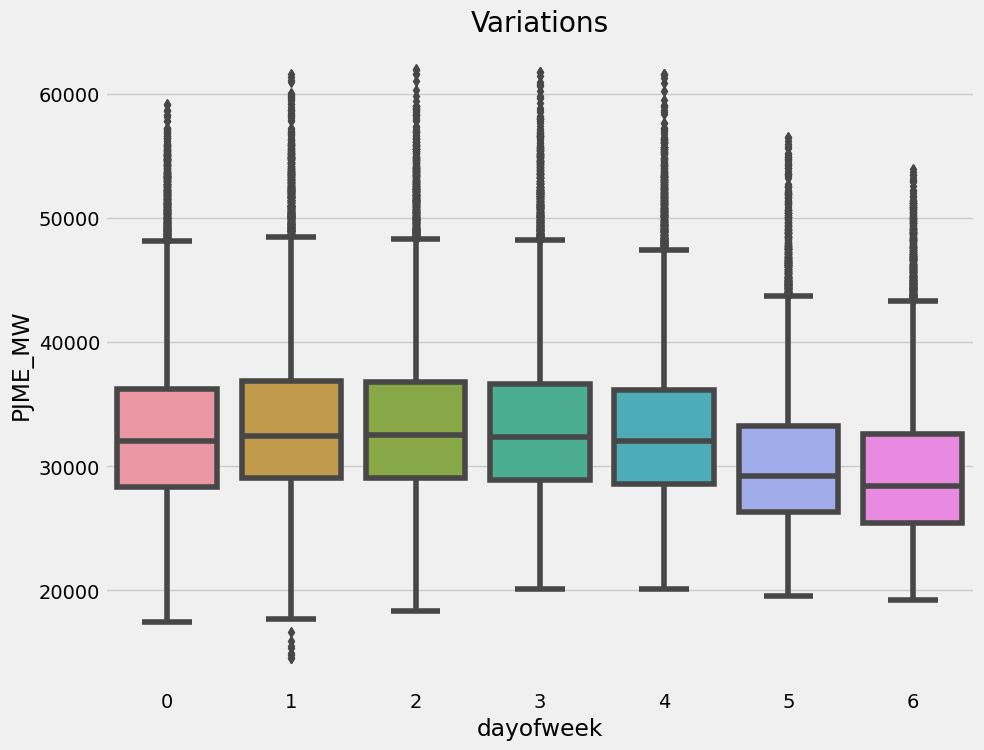

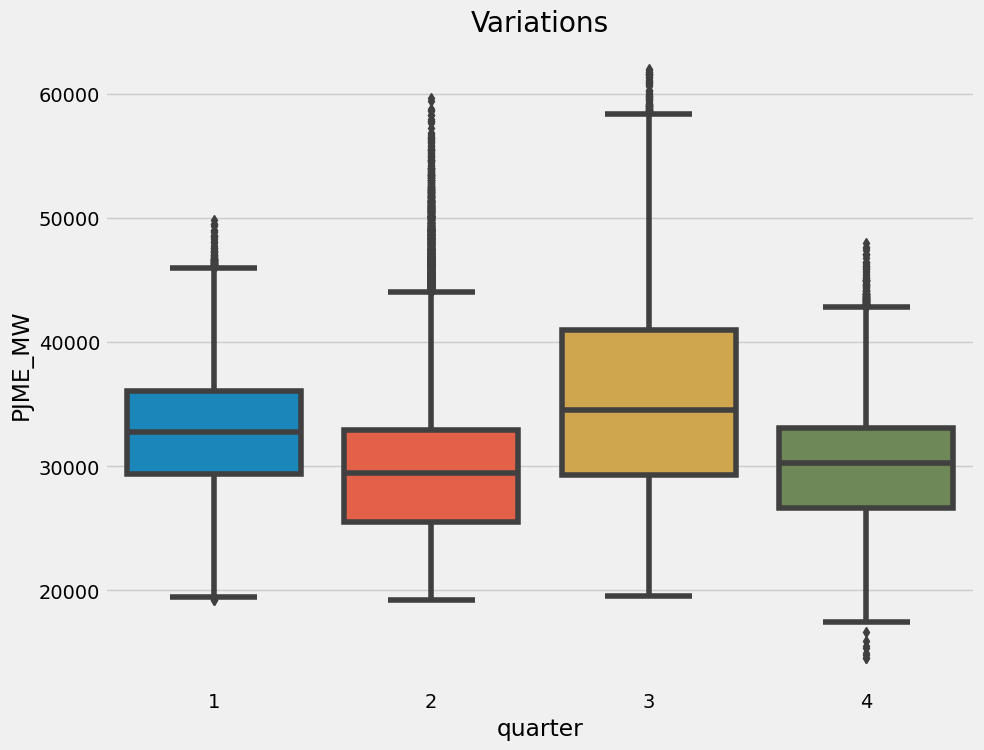

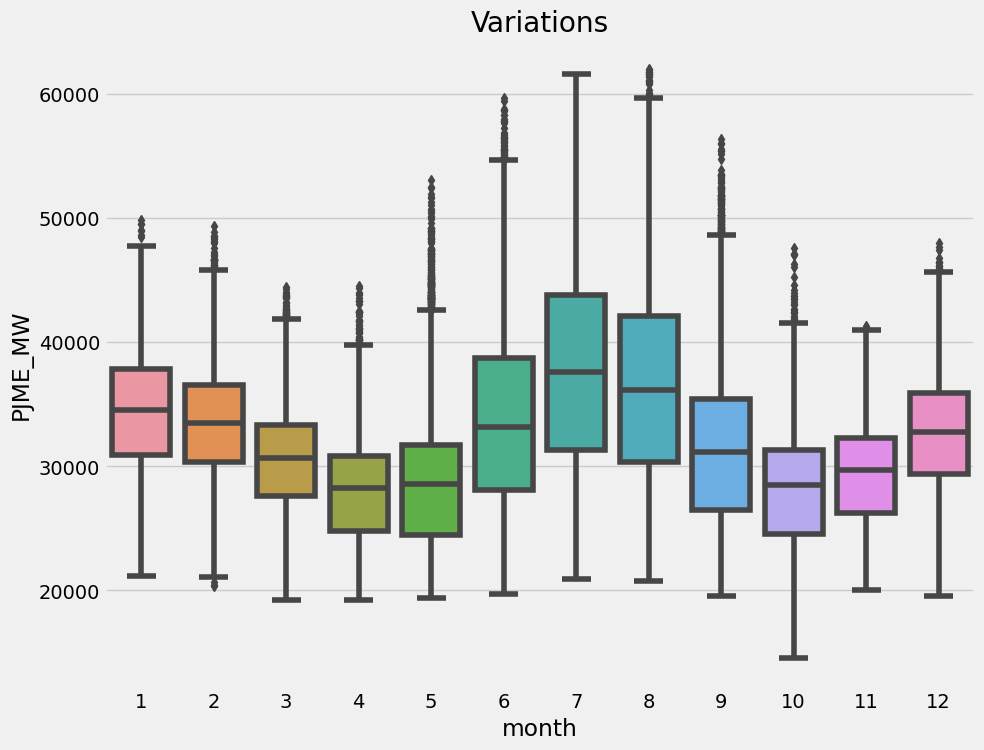

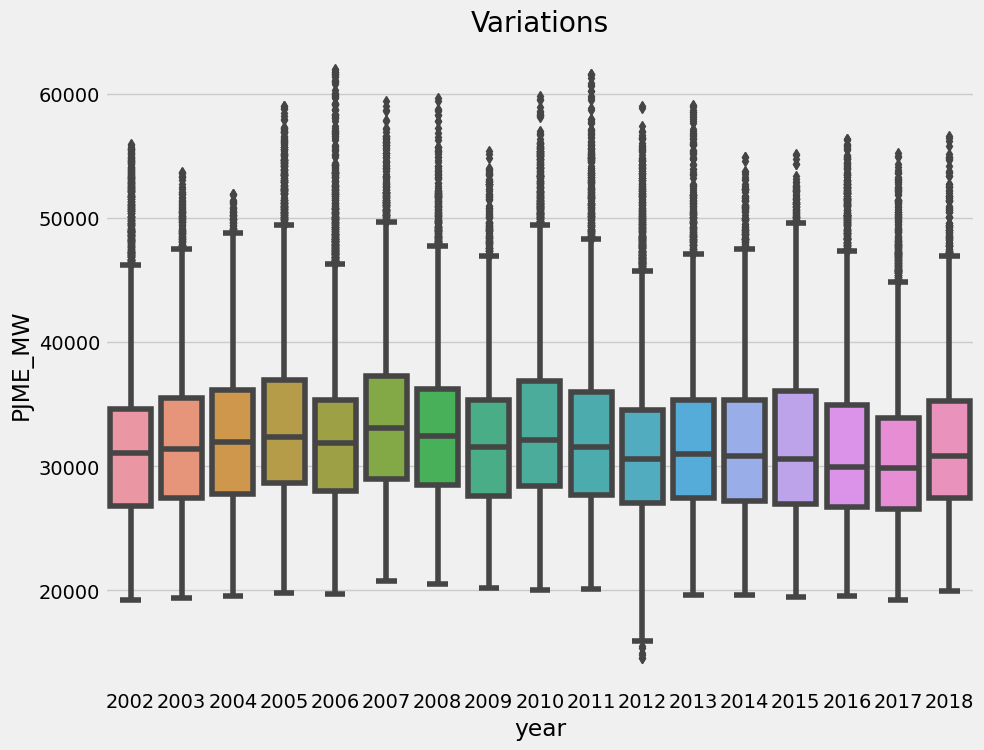

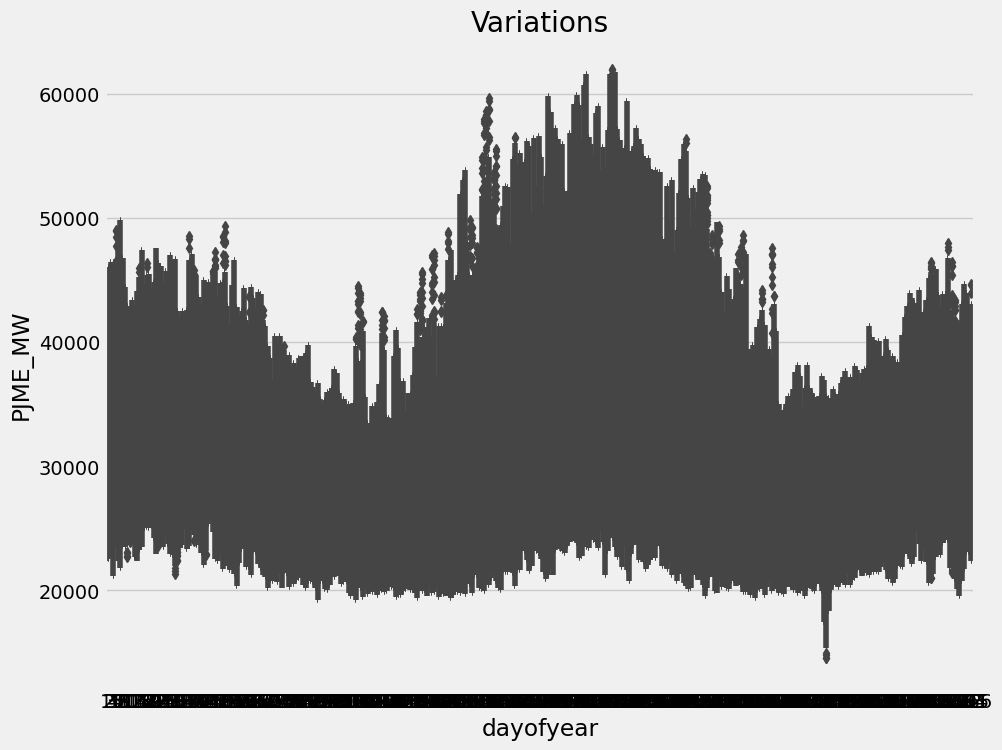

In [55]:
def visualize(data):
    for i in data.columns:
        if i!='PJME_MW':
            fig, ax = plt.subplots(figsize=(10, 8))
            sns.boxplot(data=data,x=i,y='PJME_MW')
            ax.set_title("Variations")
            plt.show()
    return
visualize(data)
            

# Model

In [56]:
data.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [57]:
train=feature(train)
test=feature(test)

features=['hour','dayofweek','quarter','month','year','dayofyear']
target='PJME_MW'

x_train=train[features]
y_train=train[target]

x_test=test[features]
y_test=test[target]


/tmp/ipykernel_32/3070865468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour']=data.index.hour
/tmp/ipykernel_32/3070865468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dayofweek']=data.index.dayofweek
/tmp/ipykernel_32/3070865468.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [58]:
model=xgb.XGBRegressor(n_estimators=1000,early_stopping_rounds=50,learning_rate=0.01)
model.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],verbose=100)

[0]	validation_0-rmse:6468.76728	validation_1-rmse:6354.00803
[100]	validation_0-rmse:3888.86397	validation_1-rmse:4203.07015
[200]	validation_0-rmse:3192.18829	validation_1-rmse:3747.13469
[300]	validation_0-rmse:2947.58422	validation_1-rmse:3650.17099
[400]	validation_0-rmse:2785.42480	validation_1-rmse:3643.81848
[418]	validation_0-rmse:2754.81833	validation_1-rmse:3647.20612


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
model.feature_importances_

array([0.3749395 , 0.13590562, 0.02310192, 0.35933682, 0.01765309,
       0.08906306], dtype=float32)

In [60]:
feature_score=pd.DataFrame(data=model.feature_importances_,index=model.feature_names_in_,columns=['Importance'])
feature_score

,Importance
hour,0.374940
dayofweek,0.135906
quarter,0.023102
month,0.359337
year,0.017653
dayofyear,0.089063


<Figure size 800x800 with 0 Axes>

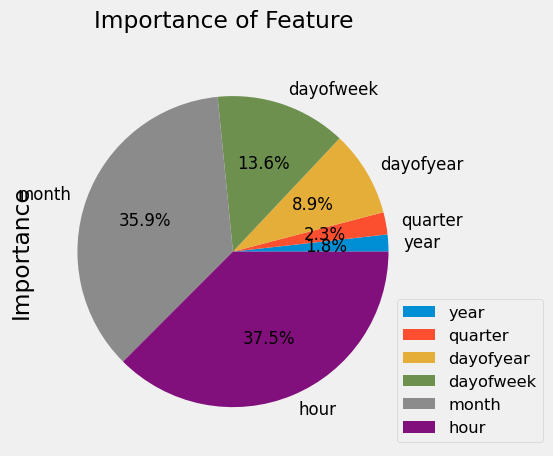

In [61]:
plt.figure(figsize=(8, 8))
feature_score.sort_values('Importance').plot(kind='pie',subplots=True,title='Importance of Feature',autopct='%1.1f%%', fontsize=12)
plt.legend(loc='upper left', fontsize='small',bbox_to_anchor=(0.9, 0.4))

# Forecasting

In [62]:
y_pred=model.predict(x_test)

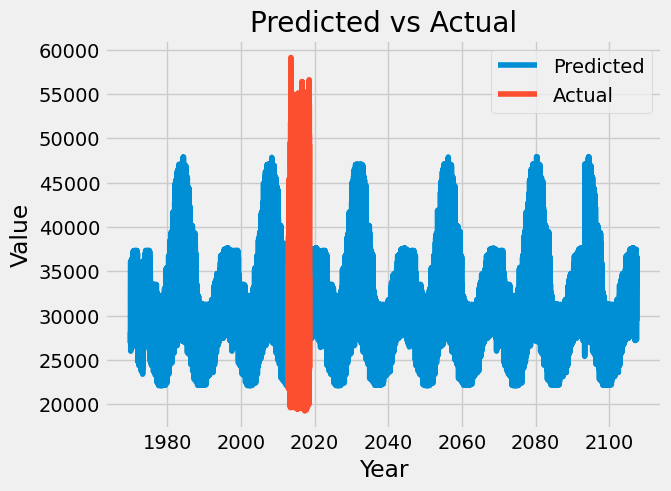

In [69]:
plt.plot(y_pred, label='Predicted')
plt.plot(y_test, label='Actual')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Predicted vs Actual')
plt.legend()

# Root Mean Square Error

In [70]:
score=np.sqrt(y_test,y_pred)
print("The Root Mean Square Error in each record for the model is",score)

The Root Mean Square Error for the model is Datetime
2012-12-31 01:00:00    172.895920
2012-12-31 02:00:00    170.032349
2012-12-31 03:00:00    168.614944
2012-12-31 04:00:00    168.662384
2012-12-31 05:00:00    170.425934
                          ...    
2018-01-01 20:00:00    210.437637
2018-01-01 21:00:00    209.167404
2018-01-01 22:00:00    205.917465
2018-01-01 23:00:00    200.409576
2018-01-02 00:00:00    196.489182
Name: PJME_MW, Length: 50182, dtype: float32


In [72]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("The overall RMSE Score is",rmse)

The overall RMSE Score is 31858.65315319719
